In [ ]:
import os
import pandas as pd
import shutil
from sklearn.utils import shuffle
from natsort import natsorted
from tqdm import tqdm

In [ ]:
# Load Plain and Gravy annotations.
pg_df = pd.read_csv("/mnt/NVME/KABR/annotation/PlainAndGravy.csv", sep=",", header=None).drop([2], axis=1)

In [ ]:
# Create mapping. For example, Z0001 -> ZG0001.
mapping = {}

for index, row in pg_df.iterrows():
    mapping[row[0]] = "Z" + row[1] + row[0].split("Z")[1]

In [ ]:
# Rename folders according to the mapping.

# path = "/mnt/NVME/KABR/dataset/image"
# i = 0

# for file in os.listdir(path):
#     if mapping.get(file) is not None:
#         print(path + os.sep + file, " -> ", path + os.sep + mapping[file])
#         shutil.move(path + os.sep + file, path + os.sep + mapping[file])
#         i += 1

# print(i)

In [ ]:
# Rename videos according to the mapping.

# path = "/mnt/NVME/KABR/dataset/video"

# for file in os.listdir(path):
#     if file[-4] != ".":
#         shutil.move(path + os.sep + file, path + os.sep + file + ".mp4")

In [ ]:
df = pd.read_csv("/mnt/NVME/KABR/annotation/data.csv", sep=" ")

In [108]:
df

,original_vido_id,video_id,frame_id,path,labels
0,Z0001,1,1,Z0001/1.jpg,0
1,Z0001,1,2,Z0001/2.jpg,0
2,Z0001,1,3,Z0001/3.jpg,0
3,Z0001,1,4,Z0001/4.jpg,0
4,Z0001,1,5,Z0001/5.jpg,0
...,...,...,...,...,...
1139888,Z0742,742,1467,Z0742/1467.jpg,1
1139889,Z0742,742,1468,Z0742/1468.jpg,1
1139890,Z0742,742,1469,Z0742/1469.jpg,1
1139891,Z0742,742,1470,Z0742/1470.jpg,1


In [ ]:
# Rename rows in the annotation file.

# for index, row in df.iterrows():
#     if mapping.get(row["original_vido_id"]) is not None:
#         df.at[index,"original_vido_id"] = mapping[row["original_vido_id"]]

# for index, row in df.iterrows():
#     value, ext = row["path"].split("/")

#     if mapping.get(value) is not None:
#         df.at[index,"path"] = mapping[value] + "/" + ext

In [111]:
df

,original_vido_id,video_id,frame_id,path,labels
0,ZG0001,1,1,ZG0001/1.jpg,0
1,ZG0001,1,2,ZG0001/2.jpg,0
2,ZG0001,1,3,ZG0001/3.jpg,0
3,ZG0001,1,4,ZG0001/4.jpg,0
4,ZG0001,1,5,ZG0001/5.jpg,0
...,...,...,...,...,...
1139888,ZG0742,742,1467,ZG0742/1467.jpg,1
1139889,ZG0742,742,1468,ZG0742/1468.jpg,1
1139890,ZG0742,742,1469,ZG0742/1469.jpg,1
1139891,ZG0742,742,1470,ZG0742/1470.jpg,1


In [112]:
df.to_csv(f"data.csv", sep=" ", index=False)

In [248]:
df = pd.read_csv("/mnt/NVME/KABR/annotation/data.csv", sep=" ")

In [250]:
df[["labels"]] = df[["labels"]].replace(0, "Walk")
df[["labels"]] = df[["labels"]].replace(1, "Graze")
df[["labels"]] = df[["labels"]].replace(2, "Browse")
df[["labels"]] = df[["labels"]].replace(3, "Head Up")
df[["labels"]] = df[["labels"]].replace(4, "Auto-Groom")
df[["labels"]] = df[["labels"]].replace(5, "Trot")
df[["labels"]] = df[["labels"]].replace(6, "Run")
df[["labels"]] = df[["labels"]].replace(7, "Occluded")

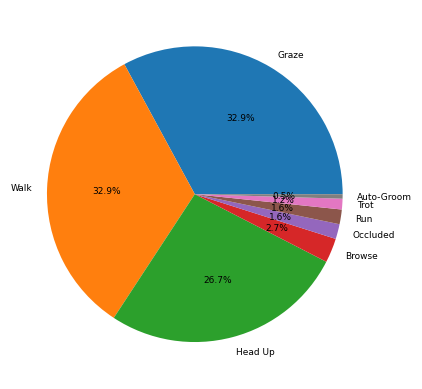

In [264]:
count = pd.Series(df["labels"].value_counts())
count_pie = count.plot.pie(autopct="%1.1f%%", ylabel="", textprops={"fontsize": 6.5})

In [265]:
df["labels"].value_counts()

Graze         375103
Walk          374640
Head Up       304037
Browse         30374
Occluded       18603
Run            18273
Trot           13307
Auto-Groom      5556
Name: labels, dtype: int64

In [60]:
df3 = df.groupby(["original_vido_id"]).count()

In [61]:
df3

,video_id,frame_id,path,labels
original_vido_id,,,,
G0067,2091,2091,2091,2091
G0068,8119,8119,8119,8119
G0069,8132,8132,8132,8132
G0070,109,109,109,109
G0071,412,412,412,412
...,...,...,...,...
ZP0633,4474,4474,4474,4474
ZP0634,4474,4474,4474,4474
ZP0635,164,164,164,164


In [269]:
index = shuffle(df3.loc[df3.index.str.startswith("G", na=False)].index)
a = list(index[:int(len(index) * 0.25)])
print(natsorted(a))
counter = 0

for index, row in df.groupby(["original_vido_id"]).count().iterrows():
    if row.name in a:
        counter += row["video_id"]

print(counter)

['G0068', 'G0078', 'G0080', 'G0082', 'G0093', 'G0100', 'G0103', 'G0104', 'G0106', 'G0109', 'G0117', 'G0118', 'G0119', 'G0121', 'G0143', 'G0145', 'G0150', 'G0154', 'G0163', 'G0374']
40138


In [165]:
index = shuffle(df3.loc[df3.index.str.startswith("ZG", na=False)].index)
a = list(index[:int(len(index) * 0.25)])
print(natsorted(a))
counter = 0

for index, row in df.groupby(["original_vido_id"]).count().iterrows():
    if row.name in a:
        counter += row["video_id"]

print(counter)

['ZG0009', 'ZG0011', 'ZG0014', 'ZG0020', 'ZG0022', 'ZG0024', 'ZG0025', 'ZG0026', 'ZG0028', 'ZG0041', 'ZG0051', 'ZG0055', 'ZG0056', 'ZG0127', 'ZG0130', 'ZG0134', 'ZG0202', 'ZG0208', 'ZG0209', 'ZG0210', 'ZG0211', 'ZG0212', 'ZG0217', 'ZG0219', 'ZG0222', 'ZG0298', 'ZG0307', 'ZG0308', 'ZG0316', 'ZG0335', 'ZG0341', 'ZG0356', 'ZG0396', 'ZG0403', 'ZG0416', 'ZG0648', 'ZG0653', 'ZG0654', 'ZG0656', 'ZG0657', 'ZG0666', 'ZG0668', 'ZG0670', 'ZG0671', 'ZG0684', 'ZG0685', 'ZG0694', 'ZG0700', 'ZG0701', 'ZG0714', 'ZG0716', 'ZG0717', 'ZG0720', 'ZG0723', 'ZG0727', 'ZG0730', 'ZG0731', 'ZG0733', 'ZG0737', 'ZG0741', 'ZG0742']
129496


In [179]:
index = shuffle(df3.loc[df3.index.str.startswith("ZP", na=False)].index)
a = list(index[:int(len(index) * 0.25)])
print(natsorted(a))
counter = 0

for index, row in df.groupby(["original_vido_id"]).count().iterrows():
    if row.name in a:
        counter += row["video_id"]

print(counter)

['ZP0034', 'ZP0037', 'ZP0042', 'ZP0049', 'ZP0053', 'ZP0054', 'ZP0091', 'ZP0164', 'ZP0170', 'ZP0172', 'ZP0173', 'ZP0180', 'ZP0181', 'ZP0190', 'ZP0191', 'ZP0192', 'ZP0193', 'ZP0198', 'ZP0201', 'ZP0228', 'ZP0243', 'ZP0245', 'ZP0246', 'ZP0248', 'ZP0250', 'ZP0256', 'ZP0259', 'ZP0267', 'ZP0268', 'ZP0283', 'ZP0304', 'ZP0305', 'ZP0321', 'ZP0324', 'ZP0325', 'ZP0327', 'ZP0330', 'ZP0342', 'ZP0343', 'ZP0344', 'ZP0346', 'ZP0350', 'ZP0360', 'ZP0367', 'ZP0375', 'ZP0385', 'ZP0391', 'ZP0408', 'ZP0413', 'ZP0420', 'ZP0425', 'ZP0427', 'ZP0428', 'ZP0429', 'ZP0434', 'ZP0437', 'ZP0439', 'ZP0440', 'ZP0446', 'ZP0447', 'ZP0449', 'ZP0450', 'ZP0451', 'ZP0454', 'ZP0461', 'ZP0463', 'ZP0464', 'ZP0469', 'ZP0473', 'ZP0481', 'ZP0484', 'ZP0485', 'ZP0491', 'ZP0494', 'ZP0499', 'ZP0507', 'ZP0510', 'ZP0513', 'ZP0514', 'ZP0521', 'ZP0522', 'ZP0525', 'ZP0540', 'ZP0544', 'ZP0546', 'ZP0555', 'ZP0558', 'ZP0559', 'ZP0567', 'ZP0573', 'ZP0575', 'ZP0580', 'ZP0583', 'ZP0585', 'ZP0593', 'ZP0594', 'ZP0604', 'ZP0607', 'ZP0610', 'ZP0613',

In [10]:
df2 = df.copy()


for index, row in df2.iterrows():
    if row["original_vido_id"].startswith("G"):
        df2.at[index,"original_vido_id"] = "G"
    elif row["original_vido_id"].startswith("ZG"):
        df2.at[index,"original_vido_id"] = "ZG"
    elif row["original_vido_id"].startswith("ZP"):
        df2.at[index,"original_vido_id"] = "ZP"

In [11]:
df2.groupby(["original_vido_id"]).count()

,video_id,frame_id,path,labels
original_vido_id,,,,
G,158748,158748,158748,158748
ZG,488638,488638,488638,488638
ZP,492507,492507,492507,492507


In [79]:
int(158748 * 0.25)

39687

In [80]:
int(488638 * 0.25)

122159

In [81]:
int(492507 * 0.25)

123126

In [187]:
# Total number of frames for test.
40138 + 129496 + 120387

290021

In [188]:
# Total number of frames.
158748 + 488638 + 492507

1139893

In [226]:
# Test % in relation to total.
290022 / 1139894

0.25442892058384375

In [274]:
test_1 = ['G0068', 'G0078', 'G0080', 'G0082', 'G0093', 'G0100', 'G0103', 'G0104', 'G0106', 'G0109', 'G0117', 'G0118', 'G0119', 'G0121', 'G0143', 'G0145', 'G0150', 'G0154', 'G0163', 'G0374']

test_2 = ['ZG0009', 'ZG0011', 'ZG0014', 'ZG0020', 'ZG0022', 'ZG0024', 'ZG0025', 'ZG0026', 'ZG0028', 'ZG0041', 'ZG0051', 'ZG0055', 'ZG0056', 'ZG0127', 'ZG0130', 'ZG0134', 'ZG0202', 'ZG0208', 'ZG0209', 'ZG0210', 'ZG0211', 'ZG0212', 'ZG0217', 'ZG0219', 'ZG0222', 'ZG0298', 'ZG0307', 'ZG0308', 'ZG0316', 'ZG0335', 'ZG0341', 'ZG0356', 'ZG0396', 'ZG0403', 'ZG0416', 'ZG0648', 'ZG0653', 'ZG0654', 'ZG0656', 'ZG0657', 'ZG0666', 'ZG0668', 'ZG0670', 'ZG0671', 'ZG0684', 'ZG0685', 'ZG0694', 'ZG0700', 'ZG0701', 'ZG0714', 'ZG0716', 'ZG0717', 'ZG0720', 'ZG0723', 'ZG0727', 'ZG0730', 'ZG0731', 'ZG0733', 'ZG0737', 'ZG0741', 'ZG0742']

test_3 = ['ZP0034', 'ZP0037', 'ZP0042', 'ZP0049', 'ZP0053', 'ZP0054', 'ZP0091', 'ZP0164', 'ZP0170', 'ZP0172', 'ZP0173', 'ZP0180', 'ZP0181', 'ZP0190', 'ZP0191', 'ZP0192', 'ZP0193', 'ZP0198', 'ZP0201', 'ZP0228', 'ZP0243', 'ZP0245', 'ZP0246', 'ZP0248', 'ZP0250', 'ZP0256', 'ZP0259', 'ZP0267', 'ZP0268', 'ZP0283', 'ZP0304', 'ZP0305', 'ZP0321', 'ZP0324', 'ZP0325', 'ZP0327', 'ZP0330', 'ZP0342', 'ZP0343', 'ZP0344', 'ZP0346', 'ZP0350', 'ZP0360', 'ZP0367', 'ZP0375', 'ZP0385', 'ZP0391', 'ZP0408', 'ZP0413', 'ZP0420', 'ZP0425', 'ZP0427', 'ZP0428', 'ZP0429', 'ZP0434', 'ZP0437', 'ZP0439', 'ZP0440', 'ZP0446', 'ZP0447', 'ZP0449', 'ZP0450', 'ZP0451', 'ZP0454', 'ZP0461', 'ZP0463', 'ZP0464', 'ZP0469', 'ZP0473', 'ZP0481', 'ZP0484', 'ZP0485', 'ZP0491', 'ZP0494', 'ZP0499', 'ZP0507', 'ZP0510', 'ZP0513', 'ZP0514', 'ZP0521', 'ZP0522', 'ZP0525', 'ZP0540', 'ZP0544', 'ZP0546', 'ZP0555', 'ZP0558', 'ZP0559', 'ZP0567', 'ZP0573', 'ZP0575', 'ZP0580', 'ZP0583', 'ZP0585', 'ZP0593', 'ZP0594', 'ZP0604', 'ZP0607', 'ZP0610', 'ZP0613', 'ZP0617', 'ZP0618', 'ZP0624']

test = natsorted(test_1 + test_2 + test_3)

In [275]:
test

['G0068',
 'G0078',
 'G0080',
 'G0082',
 'G0093',
 'G0100',
 'G0103',
 'G0104',
 'G0106',
 'G0109',
 'G0117',
 'G0118',
 'G0119',
 'G0121',
 'G0143',
 'G0145',
 'G0150',
 'G0154',
 'G0163',
 'G0374',
 'ZG0009',
 'ZG0011',
 'ZG0014',
 'ZG0020',
 'ZG0022',
 'ZG0024',
 'ZG0025',
 'ZG0026',
 'ZG0028',
 'ZG0041',
 'ZG0051',
 'ZG0055',
 'ZG0056',
 'ZG0127',
 'ZG0130',
 'ZG0134',
 'ZG0202',
 'ZG0208',
 'ZG0209',
 'ZG0210',
 'ZG0211',
 'ZG0212',
 'ZG0217',
 'ZG0219',
 'ZG0222',
 'ZG0298',
 'ZG0307',
 'ZG0308',
 'ZG0316',
 'ZG0335',
 'ZG0341',
 'ZG0356',
 'ZG0396',
 'ZG0403',
 'ZG0416',
 'ZG0648',
 'ZG0653',
 'ZG0654',
 'ZG0656',
 'ZG0657',
 'ZG0666',
 'ZG0668',
 'ZG0670',
 'ZG0671',
 'ZG0684',
 'ZG0685',
 'ZG0694',
 'ZG0700',
 'ZG0701',
 'ZG0714',
 'ZG0716',
 'ZG0717',
 'ZG0720',
 'ZG0723',
 'ZG0727',
 'ZG0730',
 'ZG0731',
 'ZG0733',
 'ZG0737',
 'ZG0741',
 'ZG0742',
 'ZP0034',
 'ZP0037',
 'ZP0042',
 'ZP0049',
 'ZP0053',
 'ZP0054',
 'ZP0091',
 'ZP0164',
 'ZP0170',
 'ZP0172',
 'ZP0173',
 'ZP0180

In [276]:
# Test folders=174, total=742
len(test)

184

In [277]:
# Test folders % in telation to total number of folders.
174 / 742

0.23450134770889489

In [285]:
df = pd.read_csv("/mnt/NVME/KABR/annotation/data.csv", sep=" ")

In [286]:
train_1 = []
train_2 = []
train_3 = []
train_4 = []
train_5 = []

test_1 = []
test_2 = []
test_3 = []
test_4 = []
test_5 = []

In [287]:
for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    if row["original_vido_id"] in test:
        test_1.append(row["original_vido_id"])
        test_2.append(row["video_id"])
        test_3.append(row["frame_id"])
        test_4.append(row["path"])
        test_5.append(str(row["labels"]))
    else:
        train_1.append(row["original_vido_id"])
        train_2.append(row["video_id"])
        train_3.append(row["frame_id"])
        train_4.append(row["path"])
        train_5.append(str(row["labels"]))

100%|██████████████████████████████| 1139893/1139893 [00:48<00:00, 23500.65it/s]


In [288]:
train_df = pd.DataFrame(data={"original_vido_id": train_1,
                              "video_id": pd.Series(train_2, dtype="int"),
                              "frame_id": pd.Series(train_3, dtype="int"),
                              "path": train_4, "labels": train_5})
test_df = pd.DataFrame(data={"original_vido_id": test_1,
                              "video_id": pd.Series(test_2, dtype="int"),
                              "frame_id": pd.Series(test_3, dtype="int"),
                              "path": test_4, "labels": test_5})

In [289]:
train_df.to_csv(f"/mnt/NVME/KABR/annotation/train_new.csv", sep=" ", index=False)
test_df.to_csv(f"/mnt/NVME/KABR/annotation/val_new.csv", sep=" ", index=False)